In [ ]:
#Importing all necessary packages
%matplotlib inline
import re
import string
import numpy as np
import pandas as pd

from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

In [ ]:
!pip install kora -q
from kora import drive
drive.mount("/content/drive/")
drive.link_nbs()

     |████████████████████████████████| 57 kB 2.5 MB/s 
     |████████████████████████████████| 56 kB 3.6 MB/s 
Mounted at /content/drive/


In [ ]:
#Loading Pre-Processed File Exist
import os
file_path_x_train = "drive/MyDrive/Colab Notebooks/amazon_reviews_pre_processed_data/X_train.csv"
file_path_y_train = "drive/MyDrive/Colab Notebooks/amazon_reviews_pre_processed_data/Y_train.csv"
if os.path.isfile(file_path_x_train) and os.path.isfile(file_path_y_train) :
  X_train = pd.read_csv(file_path_x_train).fillna(' ')
  Y_train = pd.read_csv(file_path_y_train).fillna(' ')
  X_train = X_train.loc[:, ~X_train.columns.str.contains('^Unnamed')]
  Y_train = Y_train.loc[:, ~Y_train.columns.str.contains('^Unnamed')]
  print('----------Training Data Loaded---------------------')

----------Training Data Loaded---------------------


In [ ]:
df = X_train
df['polarity'] = Y_train['polarity']

In [ ]:
#Total no of data
print(df.shape)

(3599999, 3)


In [ ]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

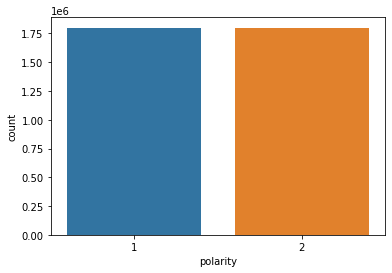

In [16]:
sns.countplot(data=df, x="polarity")
file_path = f'drive/MyDrive/Colab Notebooks/amazon_reviews_model_results/polarity_count_plot.png'
plt.savefig(file_path,bbox_inches = 'tight') 

In [18]:
# Iterate through the csv file 
count = 0
positive_list_of_words = []
df_positive = df[df['polarity']==2]

for row in df_positive.itertuples():
  # typecaste each val to string 
  val = row.title + '' + row.text
  reviews_words += " "+val+" "
  for word in val.split(' '):
      if len(word) > 3:
          positive_list_of_words.append(word)
  count += 1
  if count % 50000 == 0:
    print(count)
  if count == 100000:
    break

count = 0
negative_list_of_words = []
df_negative = df[df['polarity']==1]
for row in df_negative.itertuples():
  # typecaste each val to string 
  val = row.title + '' + row.text
  reviews_words += " "+val+" "
  for word in val.split(' '):
      if len(word) > 3:
          negative_list_of_words.append(word)
  count += 1
  if count % 50000 == 0:
    print(count)
  if count == 100000:
    break
  
# wordcloud = WordCloud(width = 800, height = 800, 
#                 background_color ='white',  
#                 min_font_size = 10).generate(reviews_words) 
  
# # plot the WordCloud image                        
# plt.figure(figsize = (8, 8)) 
# plt.imshow(wordcloud) 
# plt.axis("off") 
# plt.tight_layout(pad = 0) 
# file_path = f'drive/MyDrive/Colab Notebooks/amazon_reviews_model_results/positive_word_cloud.png'
# plt.savefig(file_path,bbox_inches = 'tight') 
# plt.show()
# plt.close()

# counter_obj = Counter(list_of_words)
# print('##########################################')
# print('Top 10 Frequent Word')
# print(counter_obj.most_common(n=5))

50000
100000
50000
100000


In [20]:
positive_set = set(positive_list_of_words) - set(negative_list_of_words)
negative_set = set(negative_list_of_words) - set(positive_list_of_words)

positive_word_list = list(positive_set)
negative_word_list = list(negative_set)

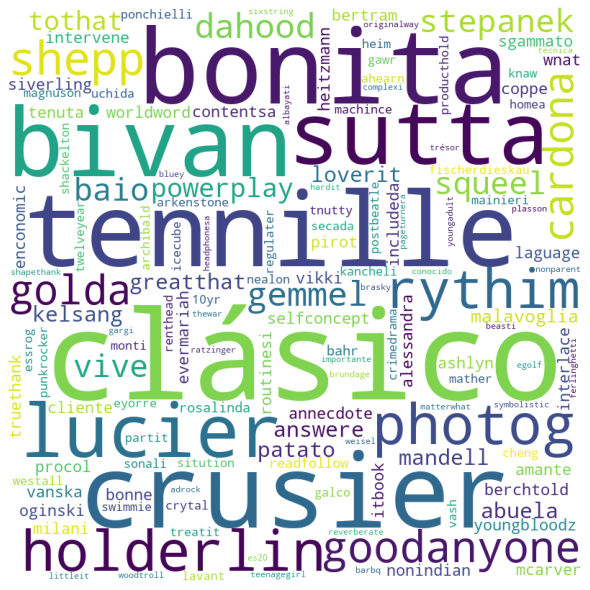

In [21]:
positive_words = ' '.join(positive_word_list)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                min_font_size = 10).generate(positive_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
file_path = f'drive/MyDrive/Colab Notebooks/amazon_reviews_model_results/positive_word_cloud.png'
plt.savefig(file_path,bbox_inches = 'tight') 
plt.show()
plt.close()

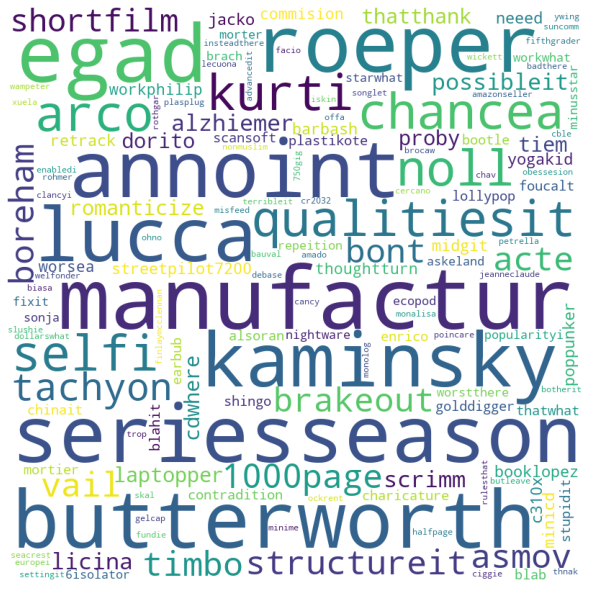

In [22]:
negative_words = ' '.join(negative_word_list)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                min_font_size = 10).generate(negative_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
file_path = f'drive/MyDrive/Colab Notebooks/amazon_reviews_model_results/negative_word_cloud.png'
plt.savefig(file_path,bbox_inches = 'tight') 
plt.show()
plt.close()

In [ ]:
df_positive = df[df['polarity']==2]
df_positive.shape

(1799999, 3)

50000
100000


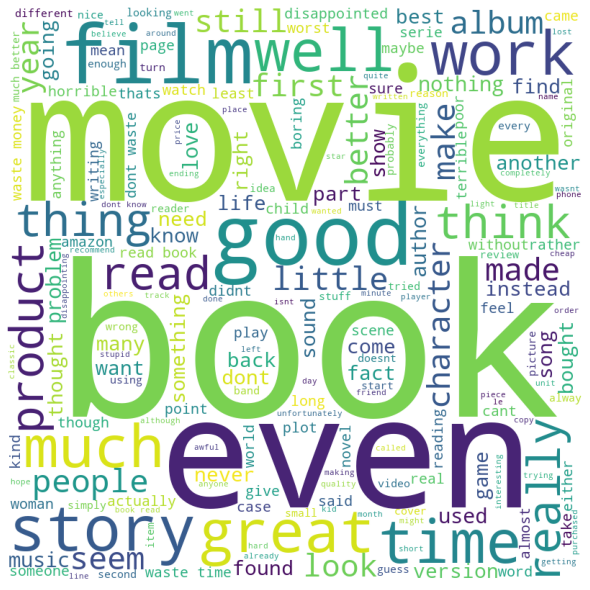

Top 10 Frequent Word
[('book', 62616), ('movie', 31953), ('like', 31650), ('would', 26924), ('good', 23930), ('time', 23797), ('dont', 21632), ('read', 19681), ('even', 17859), ('much', 15635)]


In [17]:
# Iterate through the csv file 
count = 0
reviews_words = ''
list_of_words = []
df_negative = df[df['polarity']==1]
for row in df_negative.itertuples():
  # typecaste each val to string 
  val = row.title + '' + row.text
  reviews_words += " "+val+" "
  for word in val.split(' '):
      if len(word) > 3:
          list_of_words.append(word)
  count += 1
  if count % 50000 == 0:
    print(count)
  if count == 100000:
    break
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                min_font_size = 10).generate(reviews_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
file_path = f'drive/MyDrive/Colab Notebooks/amazon_reviews_model_results/negative_word_cloud.png'
plt.savefig(file_path,bbox_inches = 'tight') 
plt.show()
plt.close()

counter_obj = Counter(list_of_words)
# print('##########################################')
print('Top 10 Frequent Word')
print(counter_obj.most_common(n=10))

In [23]:
df['review_len'] = df['text'].astype(str).apply(len)
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

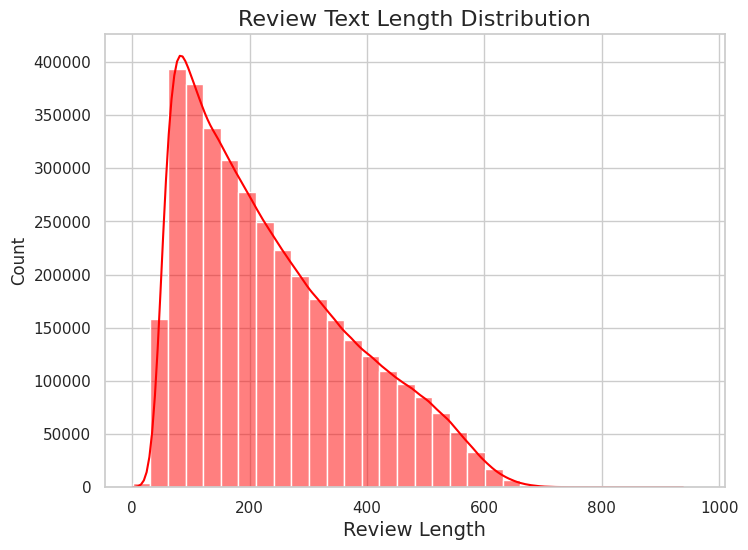

In [32]:
plt.figure(figsize=(8,6),dpi=100)
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
sns.histplot(data=df, x="review_len",binwidth=30,color='red',kde=True)
plt.title('Review Text Length Distribution', fontsize=16)
plt.xlabel('Review Length', fontsize=14)
file_path = f'drive/MyDrive/Colab Notebooks/amazon_reviews_model_results/review_text_len_distribution.png'
plt.savefig(file_path,bbox_inches = 'tight') 
plt.show()
plt.close()

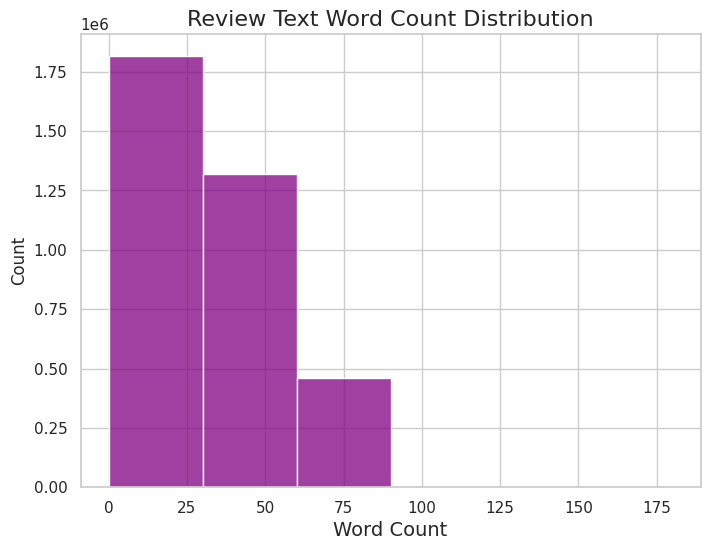

In [35]:
plt.figure(figsize=(8,6),dpi=100)
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
sns.histplot(data=df, x="word_count",binwidth=30,color='purple')
plt.title('Review Text Word Count Distribution', fontsize=16)
plt.xlabel('Word Count', fontsize=14)
file_path = f'drive/MyDrive/Colab Notebooks/amazon_reviews_model_results/review_text_word_count_distribution.png'
plt.savefig(file_path,bbox_inches = 'tight') 
plt.show()
plt.close()

In [36]:
def create_barplot(df,x_label,y_label,x_col,y_col,filename):
    plt.figure(figsize=(8,6),dpi=100)
    plt.style.use('ggplot')
    sns.set_theme(style="whitegrid")
    ax = sns.barplot(x=x_col,y=y_col,data=df,palette="viridis")

    ax.set(xlabel=x_label, ylabel=y_label)
    ax.tick_params(axis='x', rotation=30)
    plt.setp(ax.patches, linewidth=0)
    # plt.legend(title = 'Team Name', bbox_to_anchor=(1, 1))
    file_path = f'drive/MyDrive/Colab Notebooks/amazon_reviews_model_results/{filename}.png'
    plt.savefig(file_path,bbox_inches = 'tight')
    plt.show()

In [37]:
#Creating Bag Of Words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
bag_of_words_train = vectorizer.fit_transform(X_train['title'] + '' + X_train['text'])
sum_words = bag_of_words_train.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq

[('book', 1961306),
 ('like', 997579),
 ('great', 936968),
 ('good', 934701),
 ('would', 814944),
 ('time', 781358),
 ('read', 618304),
 ('movie', 607553),
 ('dont', 573700),
 ('work', 534191),
 ('really', 524866),
 ('even', 490068),
 ('much', 487129),
 ('well', 481483),
 ('make', 472512),
 ('love', 446476),
 ('first', 429901),
 ('year', 414323),
 ('product', 407836),
 ('story', 396987),
 ('better', 383835),
 ('also', 369742),
 ('album', 368444),
 ('best', 363571),
 ('song', 358123),
 ('could', 353416),
 ('thing', 341489),
 ('little', 334997),
 ('know', 324069),
 ('many', 322127),
 ('think', 319054),
 ('back', 316397),
 ('want', 310246),
 ('still', 296033),
 ('music', 290910),
 ('never', 290020),
 ('money', 279294),
 ('find', 276480),
 ('people', 273955),
 ('made', 273164),
 ('character', 270311),
 ('game', 262314),
 ('didnt', 261232),
 ('recommend', 260930),
 ('look', 258477),
 ('sound', 256544),
 ('ever', 251406),
 ('need', 245322),
 ('give', 244221),
 ('life', 244153),
 ('review', 2

In [ ]:
df = pd.DataFrame(words_freq[:20],columns=['word','word_count'])

In [38]:
create_barplot(df,'Word','Count','word','word_count','top_20_words_after_stop_words')

ValueError: ignored

<Figure size 800x600 with 0 Axes>